<a href="https://colab.research.google.com/github/mtavakoliangit/ena/blob/main/dl_lab3_ensf411_mtavakolian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Imports

In [1]:
!pip install -q fastbook

import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 48 kB 3.0 MB/s 
     |████████████████████████████████| 189 kB 30.6 MB/s 
     |████████████████████████████████| 1.2 MB 20.1 MB/s 
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 558 kB 19.6 MB/s 
     |████████████████████████████████| 51 kB 151 kB/s 
     |████████████████████████████████| 130 kB 40.4 MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *

## 1. Data loading and augmentation

Create a DataBlock and DataLoaders using:
* Training and validation images collected in Lab2
* Resize(640) as item transform
* A size of 420 in the batch transforms
* Use a batch size of 32
* Use set_seed() to obtain reproducible results.
* Augmentations you find useful (see question 1)


#### 1.1 Mount google drive

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### 1.2 Create data loader

In [4]:
path = Path('gdrive/My Drive/lab2')

In [5]:
path.ls()

(#2) [Path('gdrive/My Drive/lab2/valid'),Path('gdrive/My Drive/lab2/train')]

In [29]:
fingers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    get_y = parent_label,
    item_tfms=Resize(640),
    batch_tfms=aug_transforms(size=420, do_flip=True, max_lighting=0.2, max_warp=0.2, p_lighting=0.75, max_rotate=30.0,
                              min_zoom=0.8, max_zoom=1.0, mode='bilinear'))

In [30]:
dls = fingers.dataloaders(path)

Show a training and a validation batch. Show augmentations, i.e. show_batch() with unique=True

Reading 254 images in training folder:

In [31]:
tns = get_image_files(path/'train')
tns

(#254) [Path('gdrive/My Drive/lab2/train/three/00000000.jpg'),Path('gdrive/My Drive/lab2/train/three/00000001.jpg'),Path('gdrive/My Drive/lab2/train/three/00000002.jpg'),Path('gdrive/My Drive/lab2/train/three/00000003.jpg'),Path('gdrive/My Drive/lab2/train/three/00000004.jpg'),Path('gdrive/My Drive/lab2/train/three/00000005.jpg'),Path('gdrive/My Drive/lab2/train/three/00000006.jpg'),Path('gdrive/My Drive/lab2/train/three/00000007.jpg'),Path('gdrive/My Drive/lab2/train/three/00000008.jpg'),Path('gdrive/My Drive/lab2/train/three/00000009.jpg')...]

Reading 55 images in validation folder:

In [32]:
vns = get_image_files(path/'valid')
vns

(#55) [Path('gdrive/My Drive/lab2/valid/four/00000000.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000001.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000002.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000003.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000004.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000005.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000006.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000007.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000008.jpg'),Path('gdrive/My Drive/lab2/valid/four/00000009.jpg')...]

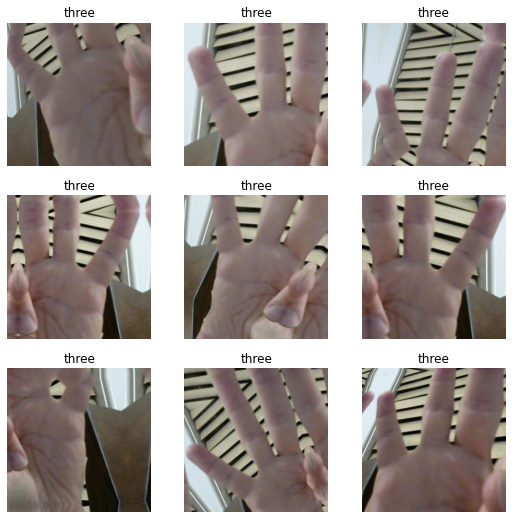

In [34]:
dls.train.show_batch(max_n=9, nrows=3, unique=True)

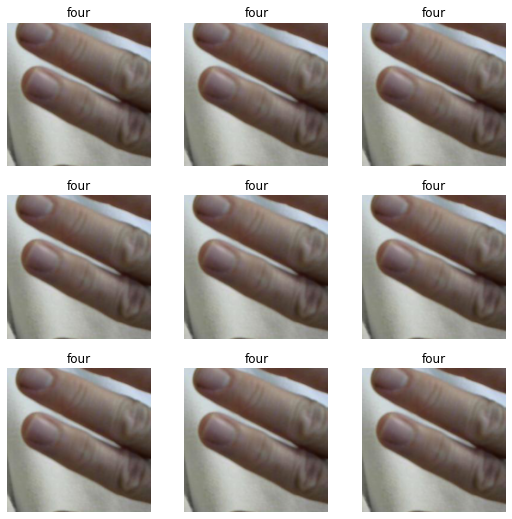

In [36]:
dls.valid.show_batch(max_n=9, nrows=3, unique=True)

### Question 1: How did you choose your augmentation transfroms? Include your thought process.

Having referred to docs.fast.ai, I chose some augmentation techniques to keep the fingers in the picture and at the same time, alter the light, direction, zooming, etc. and also flip the images. This should provide enough alteration for the training database to avoid bias.

### Question 2: Are there any problems with your augmentations in the training data, or validation data, e.g. fingers missing, etc.?

1. Having looked at the validation sample pictures, I am not confident enough that my augmentation techniques have kept all the fingers iin the images. I avoided crop technique, but I still see some pictures are cropped, don't know why! I changed the unique to False and confirmed that the fingers are kept inside the images.
2. I could not take control of which picture or number to be taken when unique is True.

## 2. Train the classifier

### 2.1 Train a fastai cnn multi-class classifier

* ResNet18 architecture.
* accuracy as metric.
* learning rate finder to find initial learning rate.
* transfer learning with unfreezing using descriminative learning rates.
* use a batch size of 32 and the DataBlock from above.
* Use the same set_seed() as above to obtain reproducible results.

### Question 3: How did you select the number of epochs and learning rates?

### 2.2 Experiment with different batch sizes

Using the pipeline, number of epochs, learning rates from above, re-run the pipeline with a batch size of 16, 64

### Question 4: Keeping number of epochs and learning rates the same, how are validation loss and accuracy effected by the increase and decrease of batch size?

## 3. Analyze model performance

Retrain the model with batch size of 32 from the previous section.

Plot the confusion matrix.

## 4. Save the best model to file

Save the model using learn .export() as .pkl file. Verify that the model can be reloaded and used to make predictions.

## 5. Summary and Conclusion

Summarize:

* Augmentations used
* Training strategy, including batch size, number of epochs and learning rates.
* Accuracy achieved, summary of confusion matrix

Conclusion:

* Are you satisfied with model performance? Why, why not?

## 6. Reflection

Include a sentence or two about

* what you liked or disliked,
* found interesting, confusing, challangeing, motivating

while working on this assignment.